## PHYS 105A:  Introduction to Scientific Computing

# Random Numbers and Monte Carlo Methods

Chi-kwan Chan

## Implement a Pseudo Random Number Generator

* A typical pseudo random number generator has an internal state that is called the `seed`.

* This `seed` is then processed by a function to jump to another state.

* Pseudo random number generator is designed in a way that the outcome of the function is very sensitive to its input.

* A small difference of the seed will result a complete different result.

In [1]:
# In order to understand the concept of a random number generator, let's implement one ourself.

mynext = 1

def myrand(): # NOT RECOMMENDED for real application.
    global mynext # by default, python does not recognize variable in a different scope.
    mynext = mynext * 1103515245 + 12345
    return (mynext//65536) % 32768

# This random number generator would generate integers in the domain [0, 32768).
# This random is usually provided to user by

MYRAND_MAX = 32768-1

# There are reasons for choosing the strange constants.  Take a look at
#     https://en.wikipedia.org/wiki/Linear_congruential_generator
# if you are interested.

In [2]:
# Now, every time we run `rand()`, we will get a different number

myrand()

16838

In [3]:
# We may just print many of them at the same time:

Rs = [myrand() for i in range(100)]
print(Rs)

[5758, 10113, 17515, 31051, 5627, 23010, 7419, 16212, 4086, 2749, 12767, 9084, 12060, 32225, 17543, 25089, 21183, 25137, 25566, 26966, 4978, 20495, 10311, 11367, 30054, 17031, 13145, 19882, 25736, 30524, 28505, 28394, 22102, 24851, 19067, 12754, 11653, 6561, 27096, 13628, 15188, 32085, 4143, 6967, 31406, 24165, 13403, 25562, 24834, 31353, 920, 10444, 24803, 7962, 19318, 1422, 31327, 10457, 1945, 14479, 29983, 18751, 3894, 18670, 8259, 16248, 7757, 15629, 13306, 28606, 13990, 11738, 12516, 1414, 5262, 17116, 22825, 3181, 13134, 25343, 8022, 11233, 7536, 9760, 9979, 29071, 1201, 21336, 13061, 22160, 24005, 30729, 7644, 27475, 31693, 25514, 14139, 22088, 26521, 5202]


In [4]:
# Sometime it is useful to make sure your random number sequence remains the same.
# In our case, you may notice that we can simply reset the `mynext` global variable to reset the sequence.
# The value you put in `mynext` is often called the "seed".

print('The following two lists are not the same:')
print([myrand() for i in range(10)])
print([myrand() for i in range(10)])

print('We may ensure that they are the same by "seeding" the random number generator with a fixed value:')

mynext = 1234
print([myrand() for i in range(10)])

mynext = 1234
print([myrand() for i in range(10)])

The following two lists are not the same:
[9171, 4434, 28317, 24582, 6815, 4586, 9653, 26306, 7174, 18451]
[23448, 6473, 32434, 8193, 14110, 24748, 28210, 29320, 32049, 12956]
We may ensure that they are the same by "seeding" the random number generator with a fixed value:
[3558, 1960, 1307, 12725, 23832, 32319, 26039, 18587, 12983, 14234]
[3558, 1960, 1307, 12725, 23832, 32319, 26039, 18587, 12983, 14234]


* The above random number generator is very simple and is the *sample* implementation in many ANSI C libraries!

* However, because how the standard was written, this create a lot problems.
  * The standard only require RAND_MAX be at least 32767.  If one want to evulate 1e6 points (which is pretty small, as we will see below), you will actually be evaluating the same 32768 points 30 times each!
  * Some implementation "tried" to imporve the algorithm, e.g., swapping the lower and higher bytes.  But these tricks sometime ruins the generator!
  * We mentioned that integrating high-dimension space is an important application of Monte Carlo methods.  However, the above random number generator create correlation in k-space.
  
* Thankfully, `ptyhon`'s random number generator is based on the "more reliable" [Mersenne Twister algorithm](https://en.wikipedia.org/wiki/Mersenne_Twister).

* From now on, unless for demostration purpose, we will use python's built-in random number generators.

## Making Plots with Matplotlib

* Next, we will learn to use an important python `matplotlib` to make plots.

* Matplotlib is one of the most important python package.

* It is heavily influenced by MatLab.

* https://matplotlib.org/

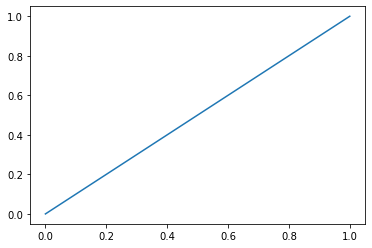

In [5]:
from matplotlib import pyplot as plt

plt.plot([0,1], [0,1])
plt.show() # optional if you use Jupyter Notebook

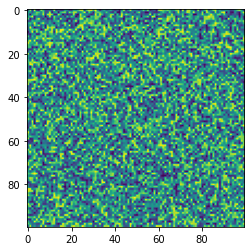

<Figure size 432x288 with 0 Axes>

In [6]:
# We may even plot the random numbers

ll = [[myrand() for i in range(100)] for j in range(100)]

plt.imshow(ll)
plt.show() # optional if you use Jupyter Notebook

plt.savefig('rand.png')

## Using Python's Random Number Module

In [7]:
# Let's now try python's random number library

import random as rnd

print(rnd.random())             # return a random float in the range [0,1)
print(rnd.randrange(100))       # return a random int in the range [0, stop)
print(rnd.randint(a=0,b=99))    # return a random int in the range [a, b+1)
print(rnd.gauss(mu=0, sigma=1)) # sample from a Gaussian distribution

0.9166857985072654
61
82
-0.15060464449332012


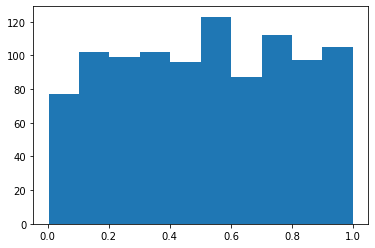

In [8]:
# We may plot the results of these random number generators

Rs = [rnd.random() for i in range(1000)]
plt.hist(Rs)
plt.show() # optional if you use Jupyter Notebook

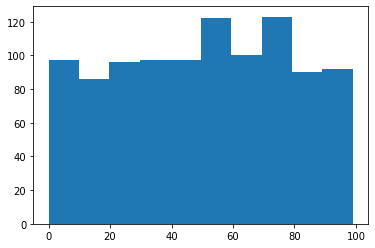

In [9]:
Rs = [rnd.randrange(100) for i in range(1000)]
plt.hist(Rs)
plt.show() # optional if you use Jupyter Notebook

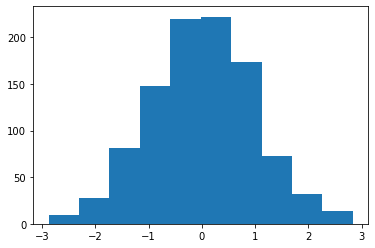

In [10]:
Rs = [rnd.gauss(0, 1) for i in range(1000)]
plt.hist(Rs)
plt.show() # optional if you use Jupyter Notebook

In [11]:
# There is also a seed() function

rnd.seed(1234)
print([rnd.randrange(100) for i in range(10)])

rnd.seed(1234)
print([rnd.randrange(100) for i in range(10)])

[99, 56, 14, 0, 11, 74, 4, 85, 88, 10]
[99, 56, 14, 0, 11, 74, 4, 85, 88, 10]


# Random Walk

* Once we have a (pseudo) random number generator, we are ready to develop Monte Carlo methods!

* We will start with a simple example of random walk.  The model is very simple:
  * We start with a (drunk) person at the center of the street.
  * As the person step forward toward +t, the person random also step left +1 or right -1.
  * The problem is, after n steps, how far away is the person away from the center of the street?

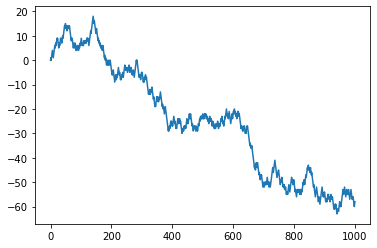

In [12]:
# We may step up this problem in the following way:

T = range(1000+1)
X = [0] # initial position

for t in T[1:]:
    last = X[-1]            # last position
    r    = rnd.randint(0,1) # we generate 0 or 1 randomly
    if r == 0:              # depending on r, we step left or right
        curr = last + 1
    else:
        curr = last - 1
    X.append(curr)          # append the current position to the list X

# We may plot this random walk
plt.plot(T, X)
plt.show() # optional if you use Jupyter Notebook

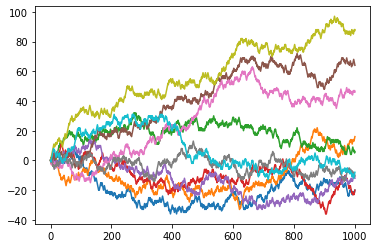

In [13]:
# Awesome!
# But in order to find out how random walk behave statistically,
# we want to be able to run many simulations!

# It is convenient to define a function

def randomwalk(n_steps=1000):
    X = [0] # initial position
    
    for t in range(n_steps):
        last = X[-1]            # last position
        r    = rnd.randint(0,1) # we generate 0 or 1 randomly
        if r == 0:              # depending on r, we step left or right
            curr = last + 1
        else:
            curr = last - 1    
        X.append(curr)          # append the current position to the list X
        
    return X                    # return the result

# And we can use this function in another loop.
for i in range(10):
    plt.plot(randomwalk())
plt.show() # optional if you use Jupyter Notebook

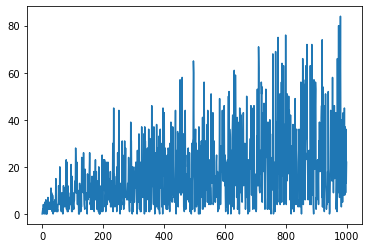

In [14]:
# We may now ask how far away the person would walk depending on the number of stpes.

D = []
for t in T:
    X = randomwalk(t)
    D.append(abs(X[-1]))
    
plt.plot(D)
plt.show() # optional if you use Jupyter Notebook

# Clearly, the distance gets farther when the number of steps increase.
# But this figure is too noisy to read off the dependency.

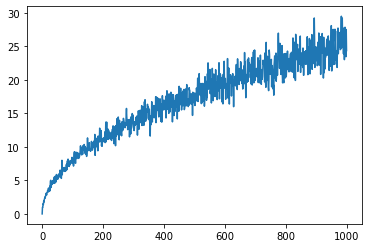

In [15]:
# There are multiple ways to make the above figure less noisy.
# One way is to simply do multiple numerical experiments for the same number of steps.
# And obtain the average distance.

n_trials = 100
D = []
for t in T:
    M = 0
    for trial in range(n_trials):
        X  = randomwalk(t)
        M += abs(X[-1])
    M /= n_trials
    D.append(M)
    
plt.plot(D)
plt.show() # optional if you use Jupyter Notebook

# The plot is much better!

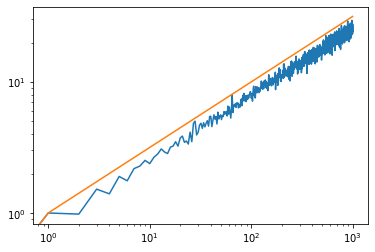

In [16]:
# Later in the class, we will learn how to fit a curve.
# But for now, let's simply plot this in log-log scale.
# And compare it with the law of diffusion D ~ sqrt(T)

plt.loglog(T, D)
plt.plot(T, [t**0.5 for t in T])
plt.show() # optional if you use Jupyter Notebook

# 2D Random Walk: Brownian motion

* You may use this simple random walk model to model real physical process.

* For example, the Brownian motion, which describe how pollen is randomly pushed by water molecules.

![Brownian motion](https://upload.wikimedia.org/wikipedia/commons/c/c2/Brownian_motion_large.gif)

* Einstein published a paper on Brownian motion in 1905, which is one of his first major scientific contributions.

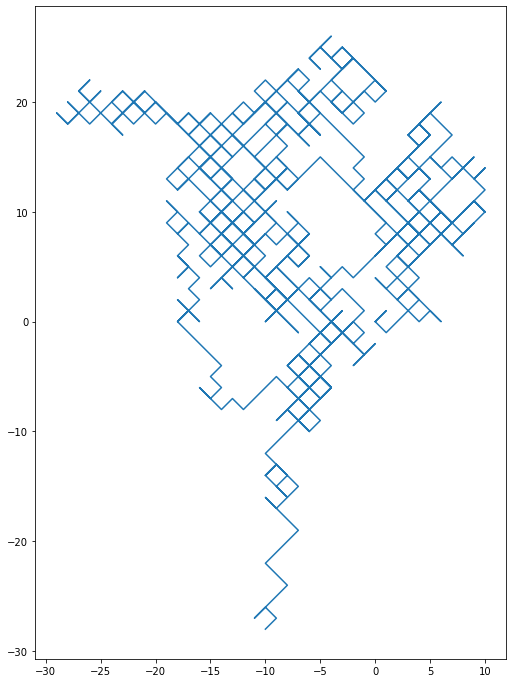

In [17]:
# The simplest model of Brownian motion is simply a two-dimension random walk.

X = randomwalk()
Y = randomwalk()

plt.figure(figsize=(12,12))
plt.plot(X, Y)
plt.gca().set_aspect('equal')

# The resulting plot looks slightly funny because random walk forces x and y both to move at exactly one step.
# The final outcome is that the particle can only move in diagonal directions.

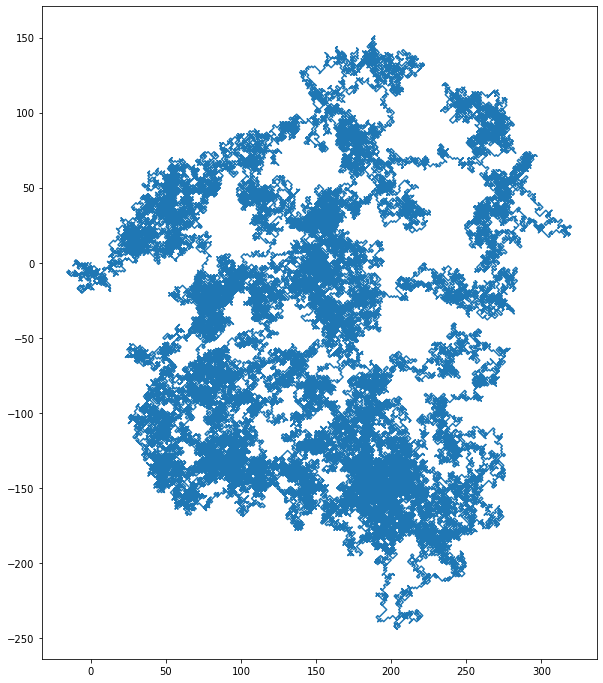

In [18]:
# But this artifact becomes irrelevant when we model random walk for many many more steps.

X = randomwalk(100000)
Y = randomwalk(100000)

plt.figure(figsize=(12,12))
plt.plot(X, Y)
plt.gca().set_aspect('equal')

# Here is a physics question: how far does a Brownian motion particle move as a function of time?